<a href="https://colab.research.google.com/github/firas-chakroun/Formation/blob/main/DA0105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_Top"><img src = "https://ibm.box.com/shared/static/fvp89yz8uzmr5q6bs6wnguxbf8x91z35.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1>

 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

#### Recommended, Python for Data Science click to start course:
  
  <a href="http://cocl.us/DA0101ENtoPY0101EN"><img src = "https://ibm.box.com/shared/static/jmtb4pgle2dsdlzfmyrgv755cnqw95wk.png" width = 300, align = "center"></a>


# Module 5: Model Evaluation and Refinement

We have built models and made predictions of vehicle prices. But how accurate are these predictions and how much should they be relied on?



# Table of content
<p></p>
<li><a href="#ref1">Model Evaluation </a></li>
<li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
<li><a href="#ref3">Ridge Regression </a></li>
<li><a href="#ref4">Grid Search</a></li>
<p></p>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import clean data
path = path='/content/full_clean_df.csv'
df = pd.read_csv(path)

## Functions for plotting

In [ ]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()


In [ ]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()


<a id="ref1"></a>

# Part 1: Training and Testing
Sometimes we would like to split a dataset into two smaller datasets. For example, it is common to split a dataset into a training set to build a model and a testing set to evaluate its performance. A popular function for splitting datasets is the **train_test_split** function which randomly splits data into two sets.

In [ ]:
y_data=df['price']
x_data = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km','diesel', 'gas']]


from sklearn.model_selection import train_test_split
#depending on package version, you may need to run the line below instead of above
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 41
number of training samples: 160


The **test_size** parameter sets the proportion of data that are split into the testing set. In the above, the testing set is set to 10% of the total dataset.

**To do**: change the incorrect code below to create a testing set that is 30% of the total dataset.

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1): </h1>

<b> Use the function "train_test_split" to split up data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>
</div>

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1" class="collapse">
```
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
```
</div>



 Let's import linear models from "sklearn"

In [ ]:
from sklearn.linear_model import LinearRegression

 We create a linear regresstion model object:

In [ ]:
lre=LinearRegression()

Fit the model

In [ ]:
lre.fit(x_train,y_train)

LinearRegression()

Calculate R^2 on test data :

In [ ]:
lre.score(x_test,y_test)

0.7713145095414435

In [ ]:
lre.score(x_train,y_train)

0.8479966795590463

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b>
Find the R^2  on the test data using 90% of the data for training data
</b>
</div>

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)
lre=LinearRegression()
lre.fit(x_train,y_train)
print('for testing:',lre.score(x_test,y_test))
print('for training: ',lre.score(x_train,y_train))

for testing: 0.7985939082466829
for training:  0.8449755339221862


 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2" class="collapse">
```
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.9, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)
```
</div>


 Sometimes you do not have enuff testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for cross Cross-validation.

## Cross-validation Score

 The first lets import "cross_val_score"

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
df[df['price'] > 10 ]

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,5400.0,23,28,16845.0,10.217391,Medium,0,1,1,0
197,197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,5300.0,19,25,19045.0,12.368421,High,0,1,0,1
198,198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,5500.0,18,23,21485.0,13.055556,Medium,0,1,1,0
199,199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,4800.0,26,27,22470.0,9.038462,Medium,1,0,0,1


 We input the object, the feature in this case 'horsepower' , the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4.

In [70]:
Rcross=cross_val_score(lre,x_data, y_data,cv=3)

The default scoring is R^2, each fold has a R^2 value:

In [71]:
Rcross

array([0.84921026, 0.7642596 , 0.63708442])

 We can calculate the average and standard deviation of our estimate:

In [75]:
print("The mean of the folds are",Rcross.mean())

The mean of the folds are 0.7501847619839922


 We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.

In [76]:
-1*cross_val_score(lre,x_data[['horsepower']], y_data,cv=3,scoring='neg_mean_squared_error')

array([24587304.48788397, 32820400.24679266, 14064599.54485069])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b>
Calculate the average R^2 using two fold, find the average R^2 for the second fold using the horsepower:
</b>
</div>

In [78]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc

array([0.59015621, 0.44319613])

<div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">
```
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc[1]
```
</div>


 You can also use the function  'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the fucntion:

In [ ]:
from sklearn.model_selection import cross_val_predict

 We input the object, the feature in this case 'horsepower' , the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4.  We can produce an output:

In [79]:
yhat=cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)

In [80]:
yhat

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284, 12589.85757284, 15693.41857732,
       15693.41857732, 15693.41857732, 25159.27964101, 25159.27964101,
       25159.27964101,  4365.42091095,  7779.33801589,  7779.33801589,
        7468.98191544,  7468.98191544, 12745.03562306,  7468.98191544,
        7468.98191544,  7468.98191544, 12745.03562306, 10572.54291992,
       19417.69178271,  5917.2014132 ,  8710.40631723,  6227.55751364,
        8710.40631723,  8710.40631723,  8710.40631723,  8710.40631723,
       10262.18681948, 10262.18681948, 10262.18681948, 10262.18681948,
       12589.85757284, 12434.67952262,  9020.76241768, 10882.89902037,
       24228.21133966, 24228.21133966, 37573.52365895,  7468.98191544,
        7468.98191544,  7468.98191544,  7468.98191544,  7191.77534249,
       12625.21956696, 12625.21956696, 12625.21956696, 18223.31361641,
      


<a id="ref2"></a>

# Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples you get a better idea.It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so that we will explore it in that context.  

Let's create a  Multiple linear regression object and train using 'horsepower', 'curb-weight', 'engine-size' and  'highway-mpg'   as features.

In [ ]:
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression()

#### Prediction using training data

In [ ]:
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#### Prediction using test data

In [ ]:
yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

<ipython-input-10-82c86f4763ae>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-10-82c86f4763ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

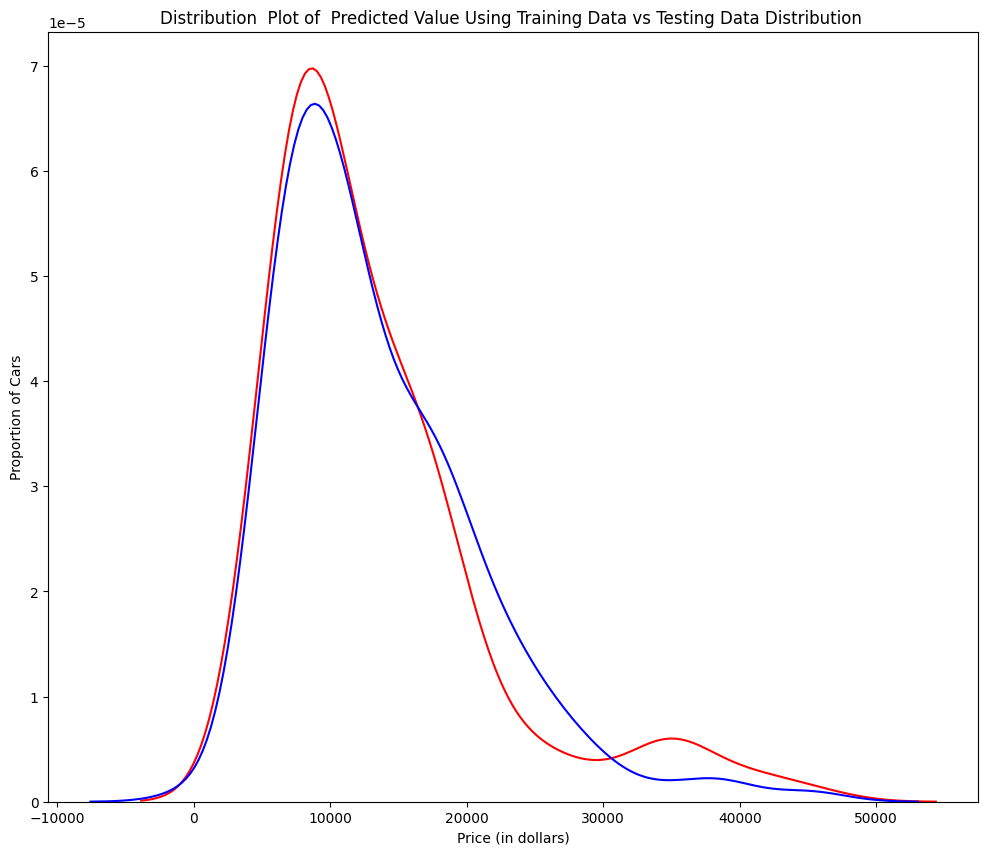

In [81]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Testing Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

#### Figur 1: Plot of predicted value using the training data compared to the training data.

So far the model seems to be doing well in learning from the training data set. But what happens when the model encounter new data it has never seen before, such as the testing data set?
When the model begins to predict the brand new data, we see the prediction accuracy drop noticeably:

<ipython-input-10-82c86f4763ae>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-10-82c86f4763ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, 

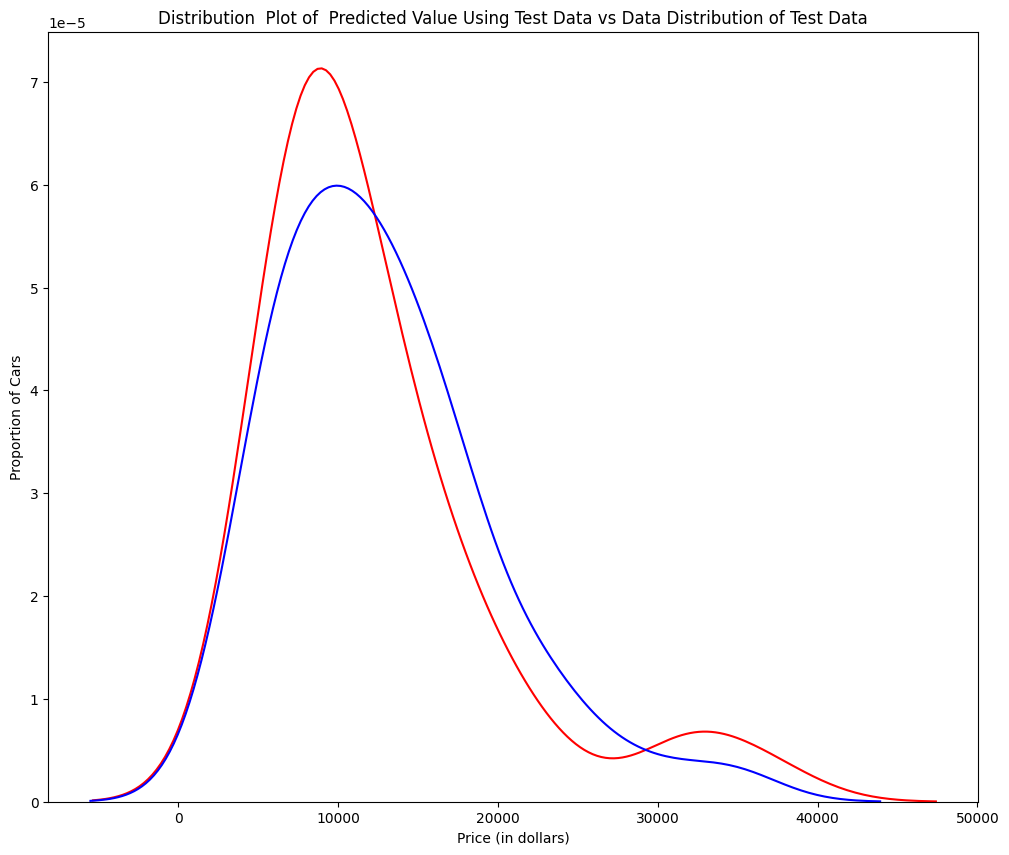

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Train Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Train",Title)

#### Figur 2: Plot of predicted value using the test data compared to the test data.

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000 where the distribution shape is extremely different.Let's see if polynomial regression also see a drop in the prediction accuracy when analyzing the test data set.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
print("done")

done


####  Overfitting
Overfitting occurs when the model fits the noise,  not the underlying process.  Therefore when test your model using the test-set your model does not perform as well as it is modeling noise, not the underlying process that generated the relationship. Lets create a degree 5 polynomial model.

Let use 50 percent of the data for testing and the rest for testing.  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

 We will perform a degree 5 polynomial transformation on the feature 'horse power'.

In [87]:
pr=PolynomialFeatures(degree=4)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])

Now let's create a linear regression model "poly" and train it.

In [88]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

 We can see the output of our model using the "predict." method and assign the values to "yhat".

In [89]:
yhat=poly.predict(x_test_pr )

 Let's compare the first five values of our model output and compare it to the true values.

In [ ]:
print("Predicted values:", yhat[0:5])
print("True values:",y_test[0:5].values)

Predicted values: [ 7769.85514603  8221.39831802 11383.77105141 21049.60149595
 21865.48658256]
True values: [ 6295. 10698. 13860. 13499. 15750.]


 We will use the function "PollyPlot" that we defended at the beginning of the module to display the training data, testing data, and the predicted function.

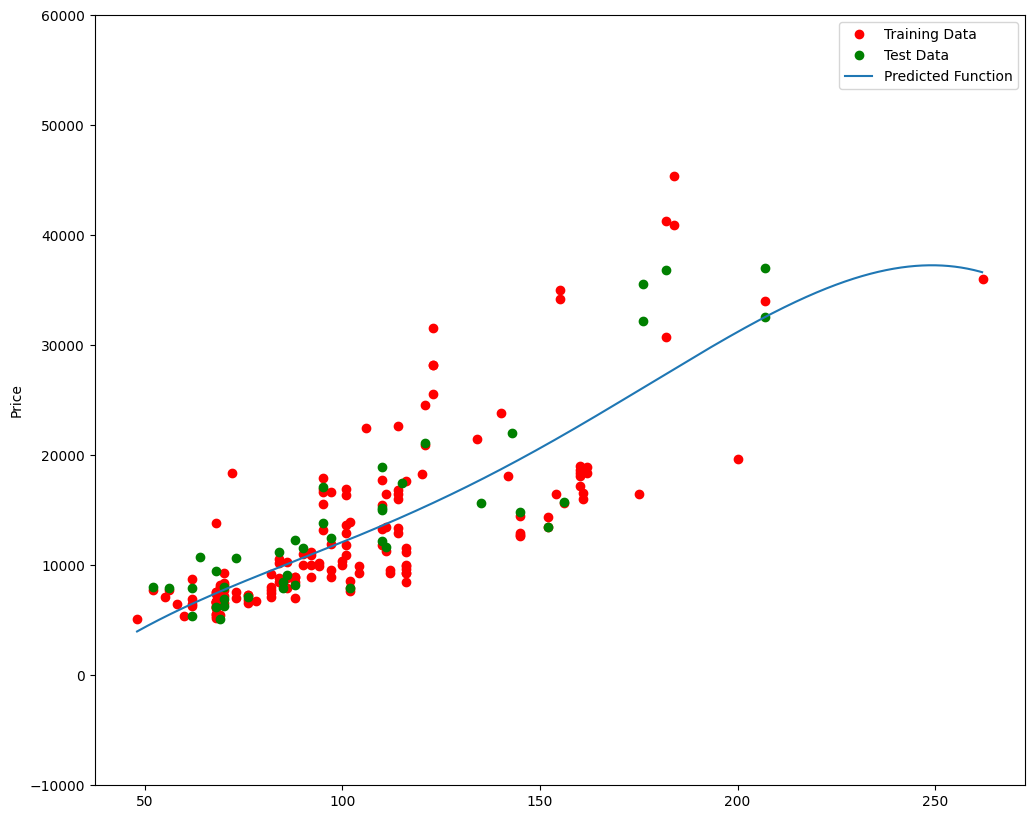

In [ ]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

#### Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function dose appears to tracks the data but around 200 horse power, the function begins to diverge from the data points. We see that the estimated function dose appears to tracks the data but around 200 horse power, the function begins to diverge from the data points.

### R-squared of the training data:

 R-squared of the training data:

In [ ]:
poly.score(x_train_pr, y_train)

0.6138427794738255

 R-squared of the test data:

In [ ]:
poly.score(x_test_pr, y_test)

0.8122534733929142

 We see the R-squared for the test data is 0.5567 while the R-squared on the test data was -29.87. A lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.  

In [82]:
Rsqu_test=[]

order=[1,2,3,4,5,6,7]
for n in order:
    pr=PolynomialFeatures(degree=n)

    x_train_pr=pr.fit_transform(x_train)

    x_test_pr=pr.fit_transform(x_test)

    lr.fit(x_train_pr,y_train)

    Rsqu_test.append(lr.score(x_test_pr,y_test))
Rsqu_test

[0.7985939082466827,
 0.6068945579181431,
 -386.1282128822529,
 -11947.526757791657,
 -43866.50005055856,
 -22934.87827548274,
 -56200.558306538565]

Text(3, 0.75, 'Maximum R^2 ')

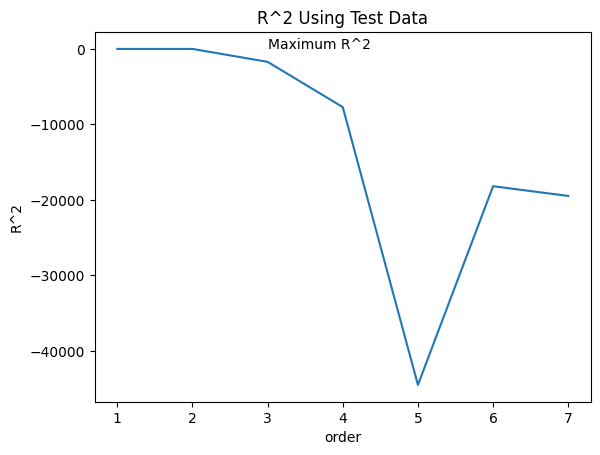

In [ ]:
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a): </h1>

<b> We can perform polynomial transformation with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
?</b>
</div>

 <div align="right">
<a href="#q2a" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2a" class="collapse">
```
pr1=PolynomialFeatures(degree=2)
```
</div>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b>
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: the method  "fit_transform"
?</b>
</div>

 <div align="right">
<a href="#q2b" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2b" class="collapse">
```
x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
```
</div>



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>

<b>
How many dimensions does the new feature have. Hint: use the mehtod "shape"
?</b>
</div>


<div align="right">
<a href="#q2c" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2c" class="collapse">
```
There are now 15 features: x_train_pr1.shape
```
</div>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b>
Create a linear regression model "poly1" and train it using the method "fit" using the polynomial features
?</b>
</div>


<div align="right">
<a href="#q2d" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2d" class="collapse">
```
poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)
```
</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>

<b>

 Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot"  to display the distribution of the predicted output vs the test data?</b>
</div>

 <div align="right">
<a href="#q2e" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2e" class="collapse">
```
yhat_test1=poly1.predict(x_train_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test1,"Actual Values (Test)","Predicted Values (Test)",Title)
```
</div>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>
 Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices.
 </div>

 <div align="right">
<a href="#q2f" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2f" class="collapse">
```
The predicted value is lower than actual value for cars where the price  $ 10,000 range, conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range. As such the model is not as accurate in these ranges  
```
<img src = "https://ibm.box.com/shared/static/c35ipv9zeanu7ynsnppb8gjo2re5ugeg.png" width = 700, align = "center">



</div>


<a id="ref3"></a>

## Part 3: Ridge regression

#### Let's perform a degree five polynomial transformation on our data.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

 Let's import the Ridge regression from sklearn ,linear models.

In [91]:
from sklearn.linear_model import Ridge

Lets create a Ridge regression object setting the regularization parameter to 0.1

In [83]:
RigeModel=Ridge(alpha=0.1)

 Like regular regression, you can fit the model using the method "fit".

In [84]:
RigeModel.fit(x_train_pr,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge(alpha=0.1)

 Similarly, you can obtain a prediction:

In [ ]:
yhat=RigeModel.predict(x_test_pr)

Let's compare the first five predicted sample to our test set

In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6303.21134185 10246.44638713 24975.39063782 21128.56627238]
test set : [ 6295. 10698. 13860. 13499.]


 We select the value of Alfa that minimizes the test error, for example, we can use a for loop.

In [92]:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALFA=np.array(range(0,1000000,5000))
for alfa in ALFA:
    RigeModel=Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr,y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr,y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr,y_train))

We can plot out the value of R^2 for different Alphas

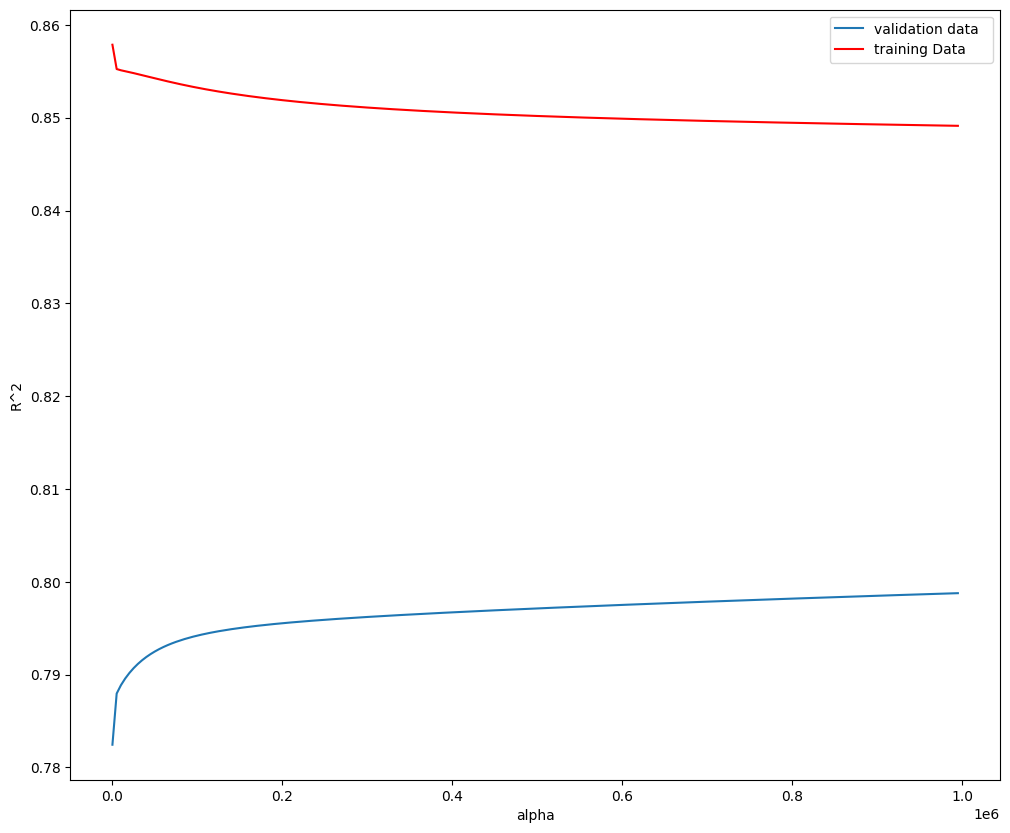

In [93]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test,label='validation data  ')
plt.plot(ALFA,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


####  Figure 6 Blue line represents the R^2 of test data, and the red line represents the R^2 of the training data, as the value for Alfa increases.

The blue line in figure 6 represents the  R^2 of the training data as Alphas increases the R^2 also increasing; therefore the model is performing better at predicting the test data.  The red line represents theR^2 of the test data, as the value for Alfa increases the R^2 decreases.  

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to  10.
</div>

<div align="right">
<a href="#q5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q5" class="collapse">
```
RigeModel=Ridge(alpha=0)
RigeModel.fit(x_train_pr,y_train)
RigeModel.score(x_test_pr, y_test)
```
</div>


<a id="ref4"></a>

## Part 4: Grid Search

Import the grid search function

In [ ]:
from sklearn.model_selection import GridSearchCV
print("done")

done


 The dictionary of parameter values

In [94]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object

In [95]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object

In [96]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model

In [97]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Find the best parameters

In [98]:
Grid1.best_estimator_

Ridge(alpha=10000)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization partner, then find the best values of the parameters

</div>

 <div align="right">
<a href="#q6" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q6" class="collapse">
```
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator
```
</div>


# About the Authors:  

This notebook written [Joseph Santarcangelo PhD]( https://www.linkedin.com/in/joseph-s-50398b136/)

Copyright &copy; 2017 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).


 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_bottom"><img src = "https://ibm.box.com/shared/static/cy2mwm7519t4z6dxefjpzgtbpi9p8l7h.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1>